In [1]:
import numpy as np
from numpy import load
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [48]:
data = np.load('puntos.npy')

data = data[0:500]

data[:,0] = preprocessing.scale(data[:,0])
data[:,1] = preprocessing.scale(data[:,1])

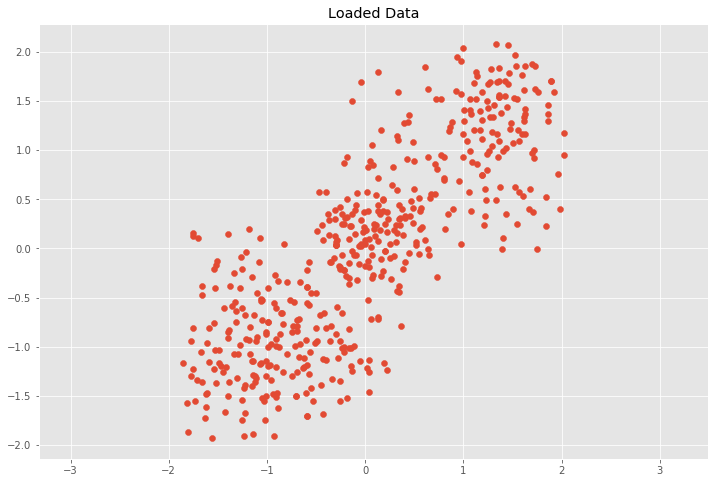

In [49]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.scatter(data[:, 0], data[:, 1])
plt.title('Loaded Data')
plt.axis('equal');

In [55]:
Cov = np.cov(data.T)

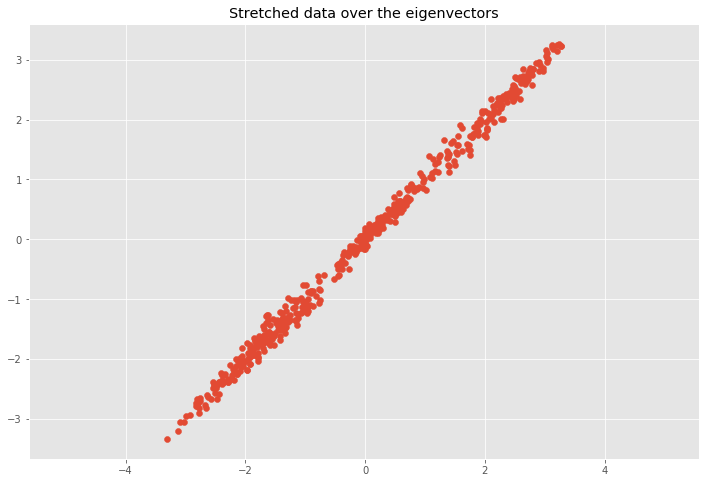

In [57]:
Stretched_data = np.dot(Cov,data.T)

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.scatter(Stretched_data[0], Stretched_data[1])
plt.title('Stretched data over the eigenvectors')
plt.axis('equal');


Ahora vemos los eigenvalues

In [79]:
eig_val,eigvec = np.linalg.eig(Cov)

In [80]:
eig_val

array([1.80906501, 0.194943  ])

In [81]:
eig_1=eig_val[0]

In [82]:
eig_1

1.8090650148523149

In [83]:
eve_1=eigvec[:,0]

In [84]:
eve_1

array([0.70710678, 0.70710678])

In [85]:
eve_1_reshaped=eve_1.reshape(2,1)

In [86]:
eve_1_reshaped

array([[0.70710678],
       [0.70710678]])

In [87]:
prim_vect=eve_1_reshaped*eig_1

In [88]:
prim_vect

array([[1.27920214],
       [1.27920214]])

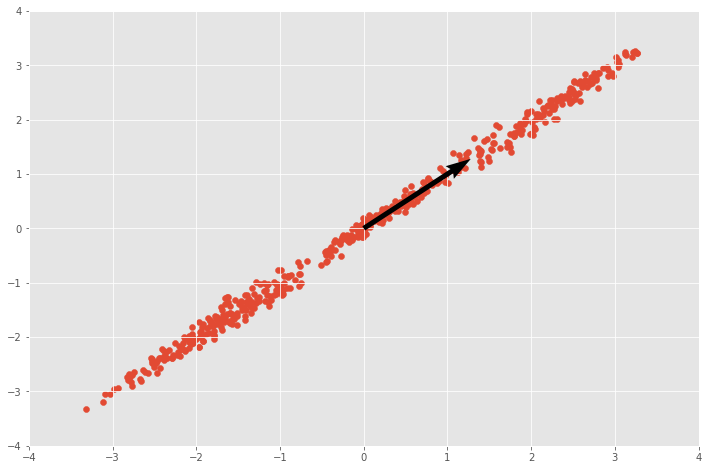

In [89]:
fig = plt.figure(1)
ax = fig.add_subplot(111)

ax.quiver(0,0, prim_vect[0], prim_vect[1],angles='xy', scale_units='xy', scale = 1)
ax.scatter(Stretched_data[0], Stretched_data[1],zorder=-1)

plt.xticks(range(-4,5))
plt.yticks(range(-4,5))

plt.show()

In [107]:
Y=[]

for x in data.T:
    Y.append(np.dot(x,eve_1_reshaped))
    
Y=np.array(Y)

In [108]:
R=[]
for i in Y:
    R.append(i*eve_1_reshaped)
R=np.array(R)    

In [112]:
len(R)

500

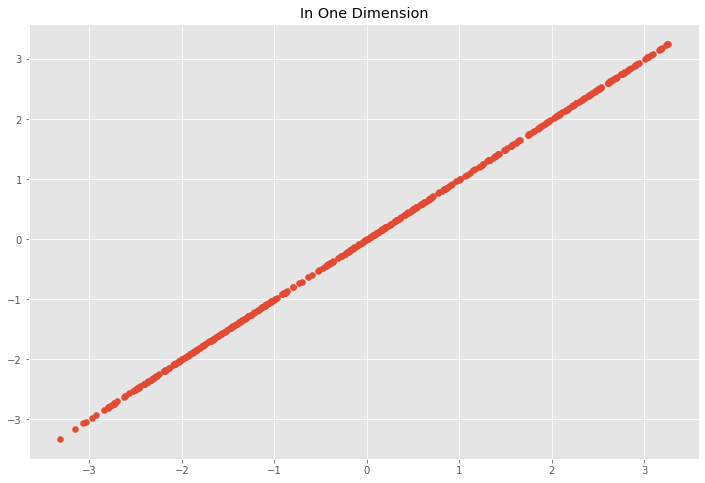

In [113]:
fig = plt.figure(1)
ax = fig.add_subplot(111)

ax.scatter(R[:,0], R[:,1])
plt.title('In One Dimension')
plt.show()